In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA에 들어가야 한다고 생각하는 것들
- 데이터 확인
    - head(), tail(), shape
- 데이터 정보 확인 : info()
    - 데이터 타입, 결측치, 수 등 확인
-   통계수치 확인 : describe()
    - 평균, min, max 등의 통계수치 확인
- 결측치 확인 : isnull().sum()
    - 시각화방법 : missingno.matrix(data)
        - 하지만 데이터 수에 비해 결측치가 적으면 보이지 않음     
- 이상치 확인
    - boxplot 시각화
    - boxplot의 IQR 활용하여 이상치 인덱스 제거
- 상관관계
    - heatmap 시각화 활용
- 타겟 데이터 분포
    - 범주형 변수라면, piechart or box 등 활용
    - 연속형 변수라면, plot, hist 등 활용??
- 데이터 분포
    - hist 활용 : 정규분포 인지 아닌지 정도?? => 왜 중요한가???, 무엇을 확인하고 싶은 건가??

# 1번
온,습도,조도,CO2농도에 따른 객실의 사용유무 판별     
종속변수 Occupancy, 0: 비어있음 , 1: 사용중    

데이터 경로 : /kaggle/input/adp-kr-p1/problem1.csv

---
---

### 1 - (1)
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

### 데이터 확인

In [4]:
# 데이터 불러오기
data1 = pd.read_csv('./data/problem1.csv', index_col='date', parse_dates=True)
data1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17910 entries, 2015-02-02 14:19:59 to 2015-02-18 09:19:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    17910 non-null  float64
 1   Humidity       17910 non-null  float64
 2   Light          17910 non-null  float64
 3   CO2            17889 non-null  float64
 4   HumidityRatio  17910 non-null  float64
 5   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 979.5 KB


In [6]:
data1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


- 데이터의 형태와 info,describe 등을 확인하였을때 Occupancy 데이터를 제외한 나머지 변수들은 연속형 변수들로 보인다.
- CO2에 결측치가 존재하는 것으로 보인다.

In [7]:
# 결측치 확인
data1.isnull().sum()

Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

<AxesSubplot:>

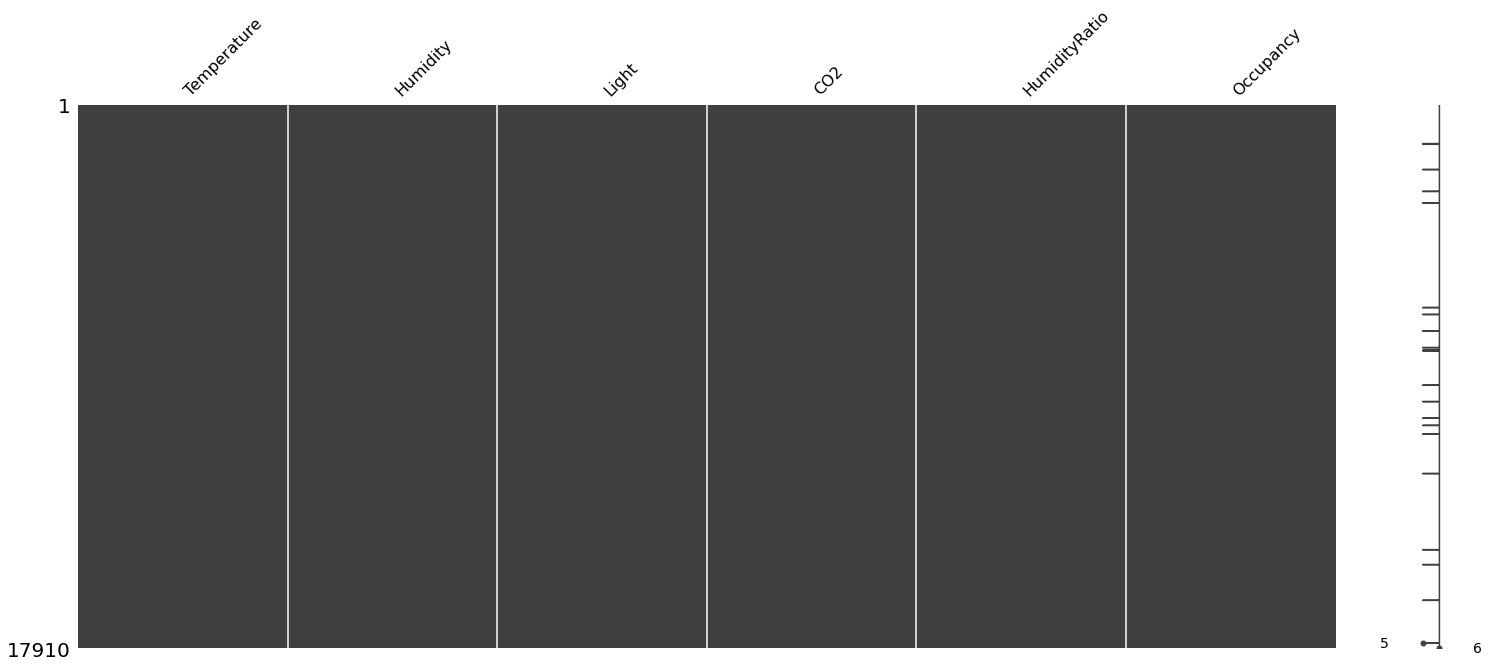

In [8]:
# 데이터 수에 비해 결측치가 너무 적어서 보이지 않음
import missingno
missingno.matrix(data1)

- 위에서 확인한 바와 마찬가지로 CO2 컬럼에 21개의 결측치가 존재함으로, 나중에 처리해주어야 한다.

---

### target data =  Occupancy 데이터 EDA

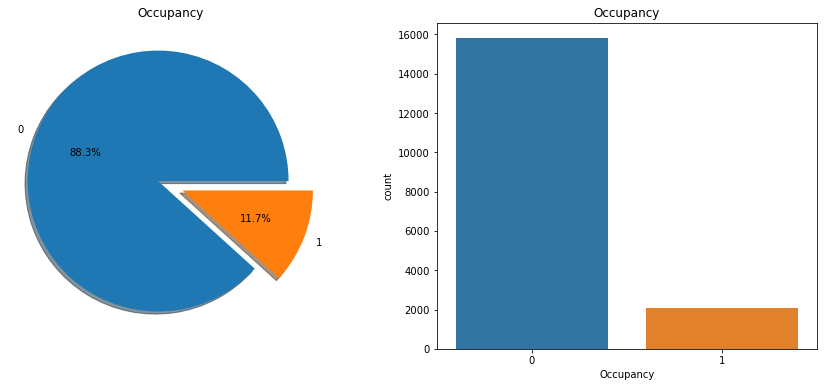

In [35]:
# 시각화활용 - target data 분포 확인
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    data1[col].value_counts().plot.pie(explode=[0.1 for i in range(data1[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=data1, ax=ax[1])
    ax[1].set_title(col)
    plt.show()
    
piecount('Occupancy')

- target 데이터는 0과 1로 이루어진 범주형 변수이며, 0의 값이 88.3%를 차지하는 불균형 데이터이다.

#### 이상치확인
- 결측치가 있으면 boxplot이 그려지지 않으므로, 결측치가 제거된 각 컬럼들의 boxplot 확인
- Light 컬럼과 CO2 컬럼의 이상치는 개수가 너무 많음으로, 두 컬럼 기준으로 이상치를 제거하는 것은 추천되지 않는다.(데이터 손실이 큼)
- 그리고 나머지 컬럼 중에는 Temperature 컬럼에만 이상치가 존재하는데 그 수 또한 무시할만하지 않다. 따라서 이상치를 제거하는 것은 추천되지 않는다.

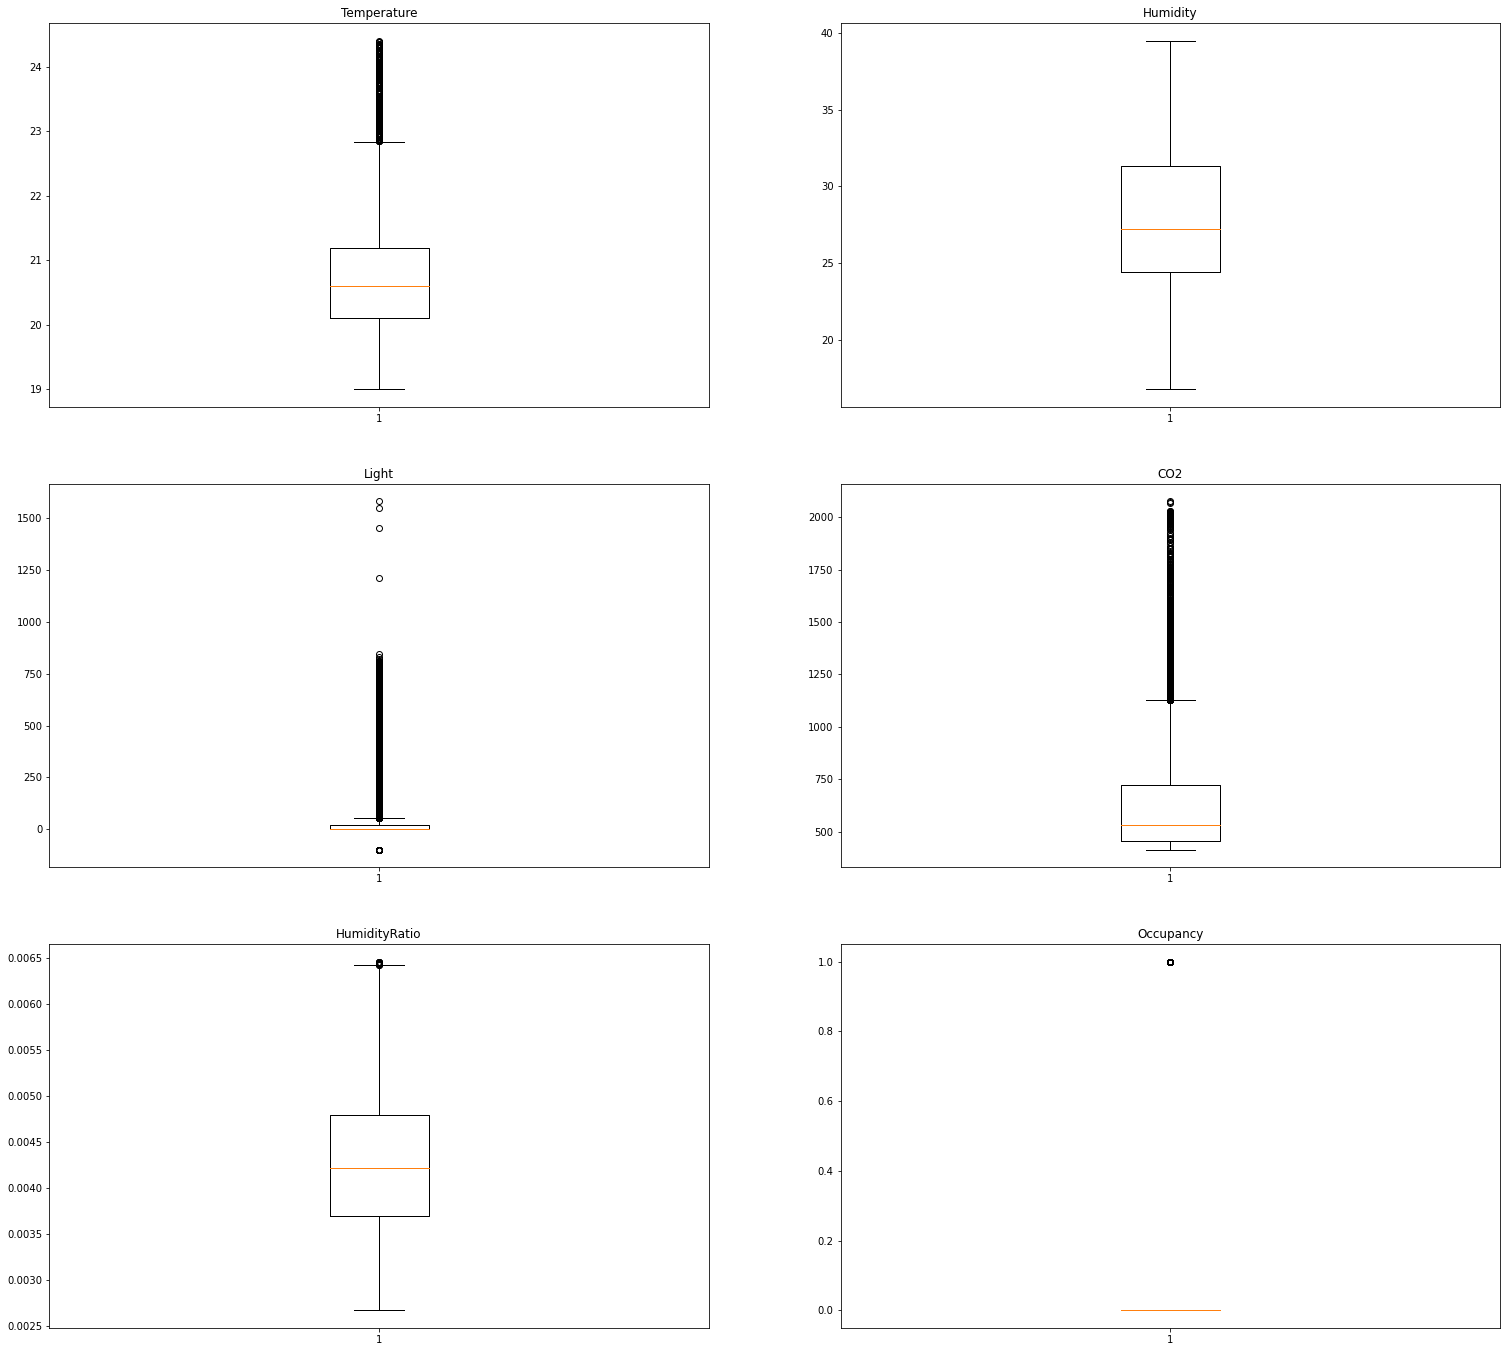

In [48]:
plt.figure(figsize=(26,24))
for i, col in enumerate(list(data1.columns)):
    plt.subplot(3,2,i+1)
    plt.boxplot(data1.dropna()[col])
    plt.title(col)

### 상관분석

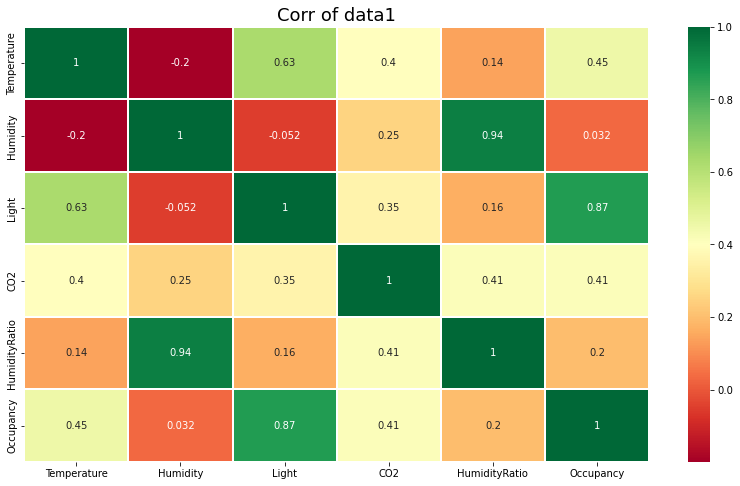

In [36]:
# 상관분석 - 히트맵 시각화
corr = data1.corr()
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Corr of data1', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, annot=True ,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
plt.show()

- 타겟데이터 Occupancy와 상관관계 
    - 높은 양의 상관관계를 가지는 변수는 Light(0.87), Temperature(0.45) 이다.
    - 음의 상관관계를 가지는 변수는 없다.
- HumiditiyRatio와 Humidy는 1에 가까운 상관관계(0.94)를 보인다. 즉, 거의 비슷한 변수이기 때문에 둘 중 한 변수를 제거하는 방법이 고려된다.


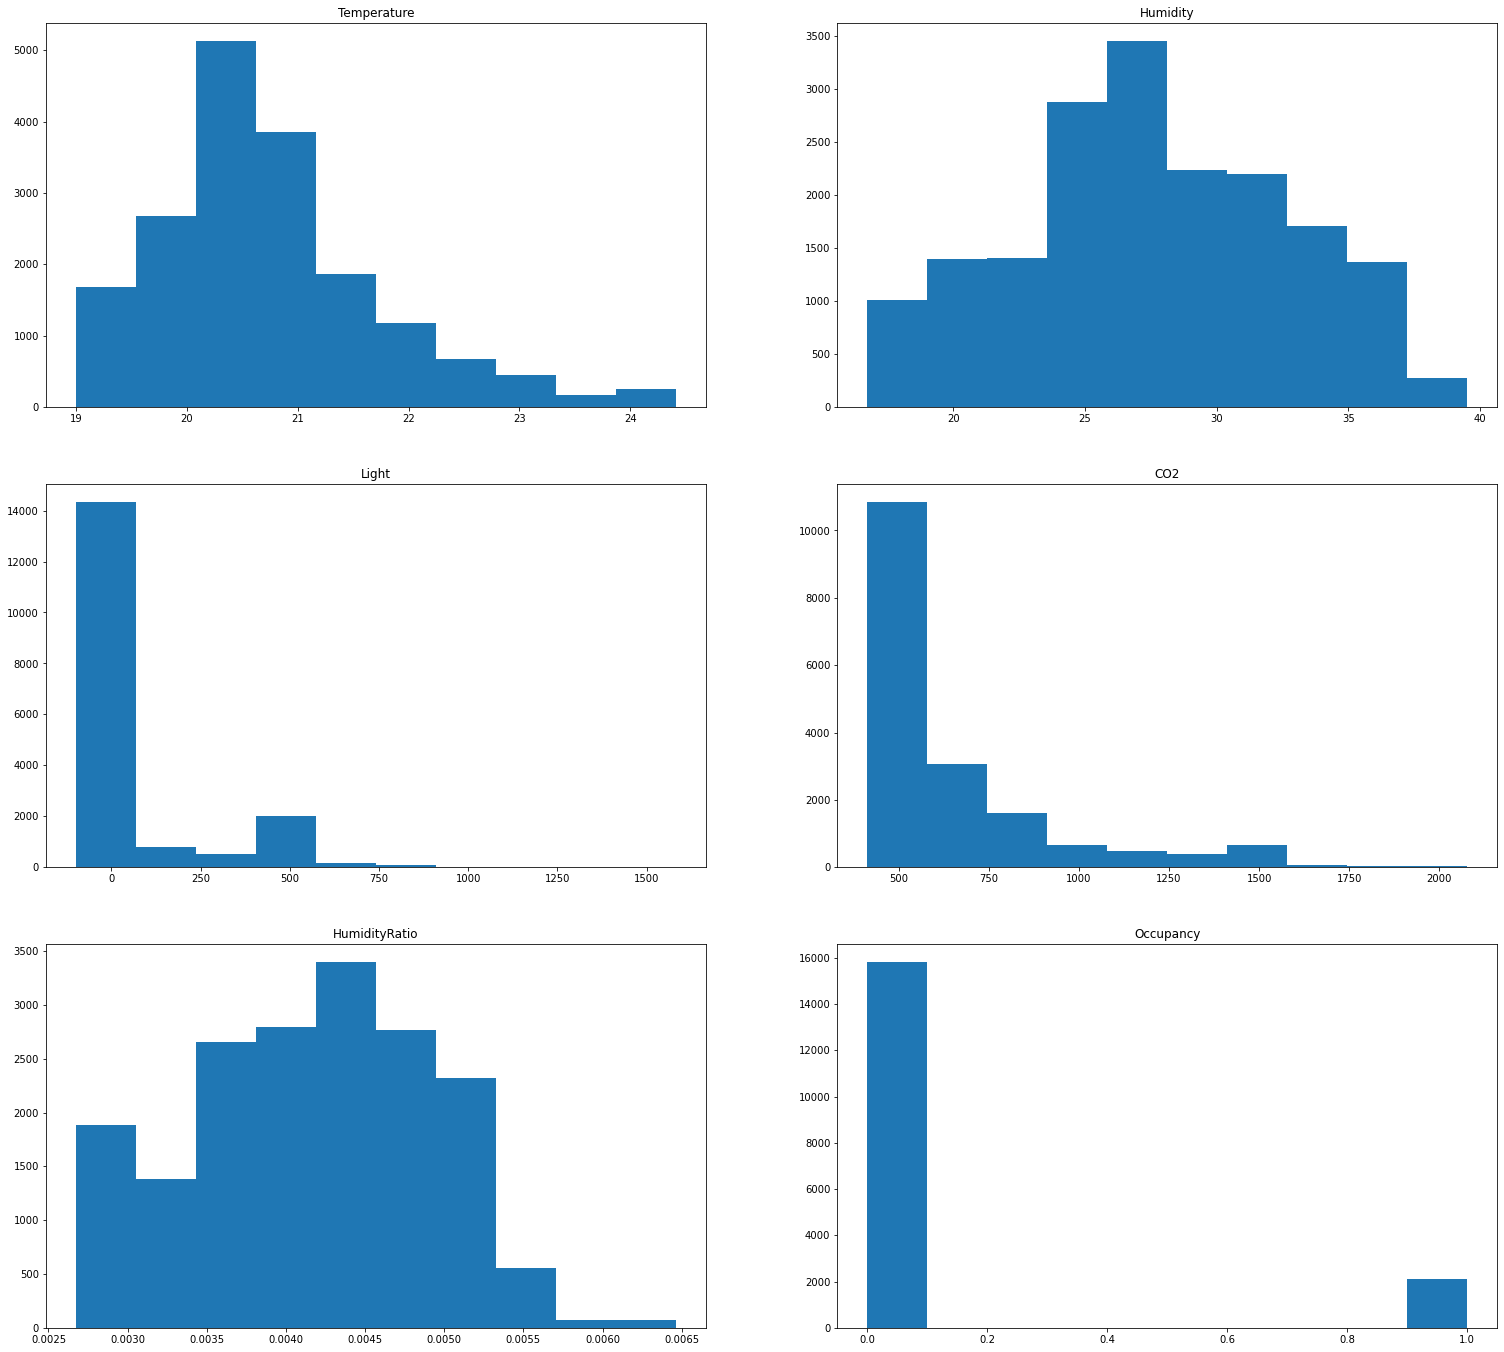

In [37]:
plt.figure(figsize=(26,24))
for i, col in enumerate(list(data1.columns)):
    plt.subplot(3,2,i+1)
    plt.hist(data1[col])
    plt.title(col)

- 한쪽으로 치우진 분포를 가지는 데이터는 CO2, Light 등이 있다.
- Humidity 데이터는 정규분포에 가깝다.
- 정규분포에 가까운 데이터를 활용하는 것이 예측성능 향상에 도움이 됨으로 데이터를 정규분포에 가깝게 변환해주는 방법을 활용해도 좋다.

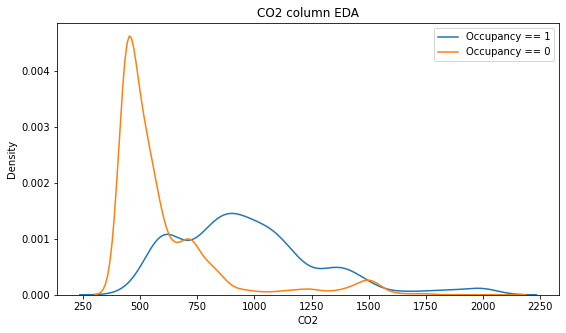

In [38]:
# CO2 데이터 EDA
def columns_EDA(col):
    fig, ax = plt.subplots(1, 1, figsize=(9, 5))
    sns.kdeplot(data1[data1['Occupancy'] == 1][col], ax=ax)
    sns.kdeplot(data1[data1['Occupancy'] == 0][col], ax=ax)
    plt.legend(['Occupancy == 1', 'Occupancy == 0'])
    plt.title(col+' column EDA')
    plt.show()

columns_EDA('CO2')

- Occupancy == 0 일 때 CO2의 수치는 500쪽에 치우쳐 있는 것을 확인할 수 있다.
- Occupancy == 1 일 때 CO2의 수치는 500-1250 에 대부분 분포하지만 특히 800-100 사이에 분포되어 있다.
- 즉, 방이 차있을 때 CO2의 수치가 눈에띄게 높은 편이다.

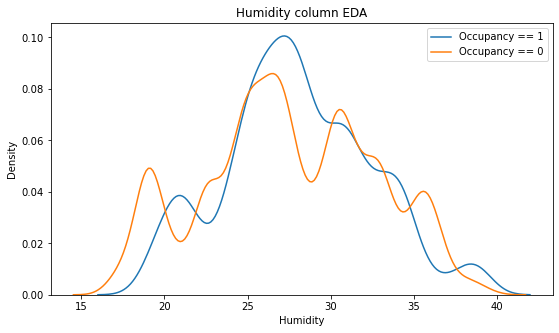

In [39]:
#Humidity 데이터 EDA
columns_EDA('Humidity')

- Humidity 데이터는 Occupancy에 따라 수치가 매우 다르다고 보기는 힘들다.
    - 사용하기 힘든 데이터라고 판단된다.

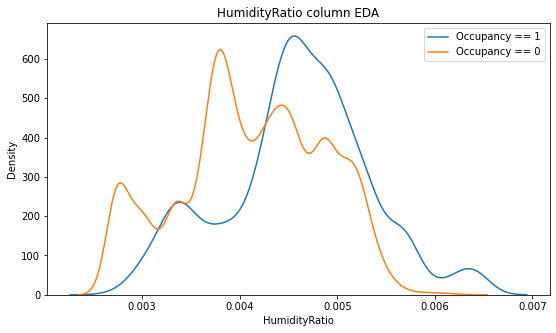

In [40]:
# HumidityRatio 데이터 EDA
columns_EDA('HumidityRatio')

- HumidityRatio는 Occupancy가 1일 때가 0일 때보다 더 높은 수치를 보이는 경향을 보인다.
- 따라서 Humidity와 HumidityRatio 변수의 상관관계가 거의 1에 가깝워서 둘 중 한 변수만 사용하기로 결정한다면, HumidtyRatio 변수를 사용하는 것이 더 효율적일 것이다.

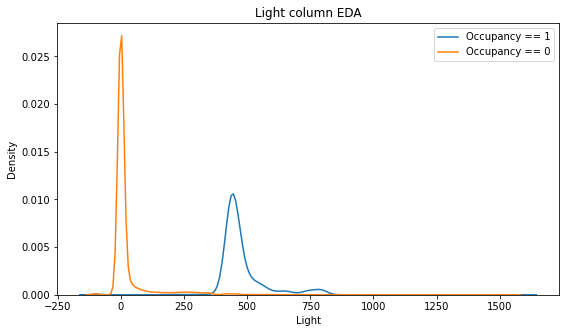

In [41]:
# Light 데이터 EDA
columns_EDA('Light')

- Occupancy가 0일 때는 거의 모든 값이 Light의 값이 0에 분포되어있다. 즉, 방이 비어있을 때는 불이 대부분 꺼져있음을 보여준다.
- Occupancy가 1일 때는 대부분의 Light 값이 400~500 사이에 모여있다. 즉, 방의 차있을 때는 조도가 거의 일정함을 보여준다.
- 따라서 이 Light 변수가 Occupancy의 값을 예측하는 가장 중요한 변수가 될 것이다.

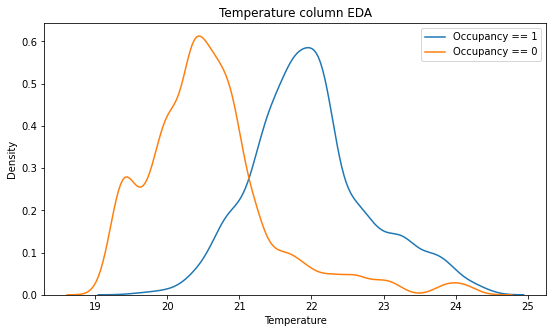

In [42]:
# Temperature 데이터 EDA
columns_EDA('Temperature')

- Occupancy가 0일 1때 0일 때보다 더 높은 값을 가지는 경향을 보인다.

### 1 - (2)
결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

- 결측치 처리 가이드라인
    - 10%미만 : 삭제 or 대치
    - 10~20% : regression or model based imputation
    - 20~50% : regression or model based imputation
    - 50% 이상 : 해당 컬럼 제거
- CO2의 결측치는 총 21개의 데이터로 0.001 = 0.1%를 차지함으로 삭제하거나 대치해도 큰 문제가 발생하지 않는다.
- 쓸데없는 오류를 범하지 않기위해 삭제하기로 한다.

In [43]:
data1.loc[data1['CO2'].isnull()]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-03 19:09:59,21.600000,28.500000,0.0,NaN,0.004548,0
2015-02-03 19:31:00,21.500000,28.050000,0.0,NaN,0.004448,0
2015-02-04 18:08:00,22.945000,27.290000,0.0,NaN,0.004728,0
2015-02-05 06:08:00,20.890000,23.290000,0.0,NaN,0.003553,0
2015-02-05 16:09:59,22.390000,26.840000,449.5,NaN,0.004494,1
2015-02-08 08:06:00,19.230000,31.100000,0.0,NaN,0.004286,0
2015-02-08 11:54:00,19.150000,30.890000,13.0,NaN,0.004235,0
2015-02-08 20:58:59,19.390000,27.390000,0.0,NaN,0.003809,0
2015-02-09 06:04:59,19.426667,26.666667,0.0,NaN,0.003717,0


- 게다가 결측치인 데이터는 데이터가 88.8.3%를 차지하는 Occupancy가 0인 데이터들이 대부분임으로 더욱 더 삭제해도 큰 문제가 없을 것으로 보인다.

In [44]:
data1.dropna(inplace=True)

### 1 - (3)
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

- Humidity 데이터를 제외하면, 나머지 컬럼의 데이터들은 타겟데이터(Occupancy)에 따라 값들에 눈에 보이는 차이가 존재했다.
    - 따라서 각 연속형 변수들의 구간화를 통해 예측을 하면 성능이 향상될 가능성이 있다.
- 눈에띄는 이상치는 존재하지 않는 것으로 보이지만 boxplot을 활용하여(IQR) 이상치를 제거한다면 데이터의 품질향상에 도움이 될 것이다.


### 2 - (1)
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성


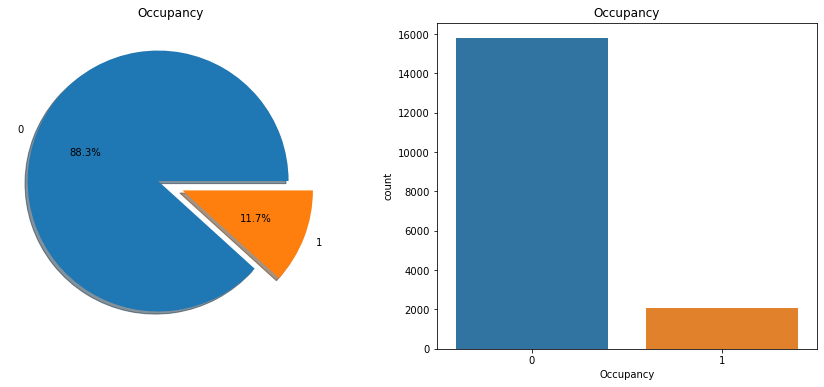

In [19]:
# target 데이터 확인
piecount('Occupancy')

- 결측치를 제거한 후에도 위 EDA에서 확인한대로 Occupancy가 0인 데이터가 88.3%를 차지하는 불균형 데이터라고 판단된다.

### 2 - (2),(3)
(2) 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

(3) 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

- 랜덤오버샘플링
    - 다수의 클래스에 속해있는 관측치들 중 무작위로 샘플링하는 것이다.
    - 장단점??? : 랜덤이기 때문에 데이터의 질에 영향을 덜 받는다. 하지만 랜덤이기 때문에 모델의 성능 또한 랜덤이다.
- SMOTE
    - 소수 클래스에 속하는 데이터 주변에 원본 데이터와 동일하지 않으면서 소수 클래스에 해당하는 가상의 데이터를 생성하는 방법
    - 장점 : Overfitting의 가능성이 줄어든다.
    - 단점 : 이상치(노이즈)를 만들 가능성이 있고, 고차원 데이터에 효율적이지 않다.

In [20]:
# 타겟데이터 분리
X = data1[data1.columns.difference(['Occupancy'])]
y = data1['Occupancy']

In [31]:
# 랜덤 오버샘플링
from imblearn.over_sampling import RandomOverSampler
# 오버샘플링 전
print('smote 전 occupancy==1 데이터 수 =', sum(data1['Occupancy'] == 1))
print('smote 전 occupancy==0 데이터 수 =', sum(data1['Occupancy'] == 0))

# 오버샘플링 후
ROS = RandomOverSampler(sampling_strategy=1)
X_random, y_random = smote.fit_resample(X,y)
print('ROS 후 occupancy==1 데이터 수 =', sum(y_random==1))
print('ROS 후 occupancy==0 데이터 수 =', sum(y_random==0))

smote 전 occupancy==1 데이터 수 = 2099
smote 전 occupancy==0 데이터 수 = 15790
ROS 후 occupancy==1 데이터 수 = 15790
ROS 후 occupancy==0 데이터 수 = 15790


In [22]:
# SMOTE 오버샘플링
from imblearn.over_sampling import SMOTE

# 오버샘플링 전
print('smote 전 occupancy==1 데이터 수 =', sum(data1['Occupancy'] == 1))
print('smote 전 occupancy==0 데이터 수 =', sum(data1['Occupancy'] == 0))

# 오버샘플링 후
smote = SMOTE(sampling_strategy=1)
X_smote, y_smote = smote.fit_resample(X,y)
print('smote 후 occupancy==1 데이터 수 =', sum(y_smote==1))
print('smote 후 occupancy==0 데이터 수 =', sum(y_smote==0))

smote 전 occupancy==1 데이터 수 = 2099
smote 전 occupancy==0 데이터 수 = 15790
smote 후 occupancy==1 데이터 수 = 15790
smote 후 occupancy==0 데이터 수 = 15790


### 3 - (1)
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

- 일반적으로 속도가 빠른 알고리즘이 있습니다. Tree기반 앙상블보다는 선형 계열이 빠릅니다. 
- 즉 Logistic Regression이 Random Forest 보다 빠릅니다. 
- 같은 Tree기반 앙상블이더라도 Random Forest가 Gradient Boosting 보다 더 빠릅니다. 
- 또한 XGboost보다는 LightGBM이 더 빠르고 메모리도 더 적게 사용합니다. 
- 머신러닝의 예측 정확도를 중요시 한다면 학습 속도는 느리지만 보다 성능이 높은 알고리즘을 선택해야 합니다.

- 속도측면에서 Logistic Regression
- 정확도 측면에서는 오버샘플링을 적용했음으로, 과적합에 강한 랜덤포레스트가 정확도측면에서 우위를 점할 것이다.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### 3 - (2)
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

- f1_score를 활용하여 성능을 평가한다.

#### 로지스틱 모델

In [36]:
# 원본 데이터
%%time
log = LogisticRegression()
log.fit(X, y)
log_f1_origin = cross_val_score(log, X, y, scoring = "f1", cv = 10)
np.mean(log_f1_origin)

Wall time: 1.35 s


0.9482625421104196

In [35]:
%%time
log = LogisticRegression()
log.fit(X_random, y_random)
log_f1_random = cross_val_score(log, X_random, y_random, scoring = "f1", cv = 10)
np.mean(log_f1_random)

Wall time: 2.13 s


0.9889965839700107

In [34]:
%%time
log = LogisticRegression()
log.fit(X_smote, y_smote)
log_f1_smote = cross_val_score(log, X_smote, y_smote, scoring = "f1", cv = 10)
np.mean(log_f1_smote)

Wall time: 1.86 s


0.9896551318849811

#### 랜덤포레스트 모델

In [38]:
%%time
ran = RandomForestClassifier(random_state=1)
ran.fit(X, y)
ran_f1_origin = cross_val_score(ran, X, y, scoring = "f1", cv = 10)
np.mean(ran_f1_origin)

Wall time: 18 s


0.8911044313628009

In [39]:
%%time
ran = RandomForestClassifier(random_state=1)
ran.fit(X_random, y_random)
ran_f1_random = cross_val_score(ran, X_random, y_random, scoring = "f1", cv = 10)
np.mean(ran_f1_random)

Wall time: 55.5 s


0.9807214904433778

In [40]:
%%time
ran = RandomForestClassifier(random_state=1)
ran.fit(X_smote, y_smote)
ran_f1_smote = cross_val_score(ran, X_smote, y_smote, scoring = "f1", cv = 10)
np.mean(ran_f1_smote)

Wall time: 54.7 s


0.9787598933464341

### 3 - (3)
위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라

- 두 모델 전부 기존 모델의 f1_score가 가장 낮게 나왔다.
- 즉, 기존모델은 모델의 정확도와 재현율이 맞지 않고, occupancy==0인 데이터에 치우쳐 있으므로 정확도만 높게 나왔을 가능성이 높다.
- 하지만, 오버샘플링 이후 정확도와 재현율이 둘다 높게 나와 f1_score도 상승한 것이다.
- 따라서, 오버샘플링 한 데이터를 모델링한 모델이 특정한 데이터를 예측할 때 더 좋은 성능을 보여 줄 가능성이 높다.